In [ ]:
import geopandas
import numpy as np
import pandas as pd

In [ ]:
# Install folium and mapclassify so the explore method of a GeoDataFrame can work properly.
! pip install folium
! pip install mapclassify

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load Geospatial Data for Census Tracts

In [ ]:
zip_file_path= '/content/drive/MyDrive/capstone_yb/tl_2020_53_tract.zip' #Washington
census_blocks = geopandas.read_file( 'zip://' + zip_file_path)
print(census_blocks.shape)
census_blocks.head()
#"STATEFP" State Number, "COUNTYFP"는 County Code

(1784, 13)


,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,53,053,072309,53053072309,723.09,Census Tract 723.09,G5020,S,3281057,2231211,+47.2193054,-122.5672166,"POLYGON ((-122.57554 47.22952, -122.56544 47.2..."
1,53,053,072311,53053072311,723.11,Census Tract 723.11,G5020,S,2443688,6948,+47.2314021,-122.5306088,"POLYGON ((-122.53713 47.21807, -122.53713 47.2..."
2,53,053,072407,53053072407,724.07,Census Tract 724.07,G5020,S,5422703,4068418,+47.2984283,-122.5635099,"POLYGON ((-122.61063 47.30733, -122.61060 47.3..."
3,53,053,072408,53053072408,724.08,Census Tract 724.08,G5020,S,15266925,5205736,+47.2877797,-122.5899163,"POLYGON ((-122.61886 47.29884, -122.61885 47.2..."
4,53,053,072409,53053072409,724.09,Census Tract 724.09,G5020,S,5871772,2575269,+47.2832879,-122.6150486,"POLYGON ((-122.64978 47.27622, -122.64950 47.2..."


In [ ]:
census_blocks.explore("STATEFP")# Explore census tract data based on the "STATEFP" column. For "53", which corresponds to Washington

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
zip_path = '/content/drive/MyDrive/capstone_yb/wa_2020.zip' #Examine the voting records datasets:WA
precincts=geopandas.read_file('zip://'+zip_path)
print(precincts.shape)
precincts # I need to edit columns.. their format is diffrent.

(7464, 37)


,COUNTY,PRECCODE,COUNTYNAME,ST_CODE,PRECNAME,G20PREDBID,G20PRERTRU,G20PRELJOR,G20PREGHAW,G20PRESLAR,...,G20ATGDFER,G20ATGRLAR,G20ATGOWRI,G20LANDFRA,G20LANRPED,G20LANOWRI,G20INSDKRE,G20INSRPAT,G20INSOWRI,geometry
0,53057,406,Skagit,SK00000406,SEDRO WOOLLEY 6,328,428,14,6,2,...,310,433,0,308,426,0,377,327,4,"POLYGON ((-122.22292 48.49439, -122.22292 48.4..."
1,53057,330,Skagit,SK00000330,MOUNT VERNON 30,546,444,23,3,1,...,506,468,1,483,475,1,605,332,1,"POLYGON ((-122.28693 48.41753, -122.28685 48.4..."
2,53061,10154387,Snohomish,SN10154387,BOSTIAN,252,154,10,0,0,...,217,188,1,234,169,1,273,126,2,"POLYGON ((-122.14714 47.80489, -122.14345 47.8..."
3,53061,10154310,Snohomish,SN10154310,PARADISE,330,364,22,2,1,...,275,418,2,292,392,1,364,297,2,"POLYGON ((-122.07690 47.81182, -122.07690 47.8..."
4,53061,10154178,Snohomish,SN10154178,BEECHER,356,326,17,4,0,...,311,383,2,325,364,2,397,255,11,"POLYGON ((-122.09333 47.85546, -122.09323 47.8..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7459,53073,122,Whatcom,WM00000122,122,203,278,12,0,0,...,185,300,1,172,311,1,234,226,5,"POLYGON ((-122.60684 48.87005, -122.60941 48.8..."
7460,53049,105,Pacific,PA00000105,RAYMOND W1P1,21,26,0,0,0,...,18,27,0,20,26,0,20,22,0,"POLYGON ((-123.75753 46.68225, -123.75734 46.6..."
7461,53049,4,Pacific,PA00000004,EKLUND PARK,56,67,2,0,0,...,59,65,0,51,69,0,62,59,0,"POLYGON ((-123.77868 46.67715, -123.77866 46.6..."
7462,53031,600,Jefferson,JE00000600,600 HOH,67,40,3,1,0,...,67,42,0,72,37,0,72,34,0,"MULTIPOLYGON (((-124.47525 47.74862, -124.4753..."


In [ ]:
precincts1 = precincts.copy()

# add 'STATEFP' =53(washington)
precincts1.insert(0, 'STATEFP', '53')

# Remove the first two characters from the 'COUNTY' column
precincts1['COUNTY'] = precincts1['COUNTY'].str[2:]

# Change the column names
precincts1.rename(columns={'COUNTY': 'COUNTYFP', 'COUNTYNAME': 'COUNTY', 'PRECNAME': 'PRECINCT'}, inplace=True)



In [ ]:
precincts1.to_csv('/content/drive/MyDrive/capstone_yb/precincts1.csv', index=False)

In [ ]:
# Calculate the percentage of votes that goes to Biden.
# Only votes to Biden or Trump are counted.
precincts1['Biden_proportion'] = precincts1['G20PREDBID'] / (precincts1['G20PREDBID'] + precincts1['G20PRERTRU'])

In [ ]:
# For unknown reason, colab cannot display these voting precincts. Perhaps there are too many precincts?
#precincts.explore("Biden_proportion", legend=False)
precincts1.shape
precincts1

,STATEFP,COUNTYFP,PRECCODE,COUNTY,ST_CODE,PRECINCT,G20PREDBID,G20PRERTRU,G20PRELJOR,G20PREGHAW,...,G20ATGRLAR,G20ATGOWRI,G20LANDFRA,G20LANRPED,G20LANOWRI,G20INSDKRE,G20INSRPAT,G20INSOWRI,geometry,Biden_proportion
0,53,057,406,Skagit,SK00000406,SEDRO WOOLLEY 6,328,428,14,6,...,433,0,308,426,0,377,327,4,"POLYGON ((-122.22292 48.49439, -122.22292 48.4...",0.433862
1,53,057,330,Skagit,SK00000330,MOUNT VERNON 30,546,444,23,3,...,468,1,483,475,1,605,332,1,"POLYGON ((-122.28693 48.41753, -122.28685 48.4...",0.551515
2,53,061,10154387,Snohomish,SN10154387,BOSTIAN,252,154,10,0,...,188,1,234,169,1,273,126,2,"POLYGON ((-122.14714 47.80489, -122.14345 47.8...",0.620690
3,53,061,10154310,Snohomish,SN10154310,PARADISE,330,364,22,2,...,418,2,292,392,1,364,297,2,"POLYGON ((-122.07690 47.81182, -122.07690 47.8...",0.475504
4,53,061,10154178,Snohomish,SN10154178,BEECHER,356,326,17,4,...,383,2,325,364,2,397,255,11,"POLYGON ((-122.09333 47.85546, -122.09323 47.8...",0.521994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7459,53,073,122,Whatcom,WM00000122,122,203,278,12,0,...,300,1,172,311,1,234,226,5,"POLYGON ((-122.60684 48.87005, -122.60941 48.8...",0.422037
7460,53,049,105,Pacific,PA00000105,RAYMOND W1P1,21,26,0,0,...,27,0,20,26,0,20,22,0,"POLYGON ((-123.75753 46.68225, -123.75734 46.6...",0.446809
7461,53,049,4,Pacific,PA00000004,EKLUND PARK,56,67,2,0,...,65,0,51,69,0,62,59,0,"POLYGON ((-123.77868 46.67715, -123.77866 46.6...",0.455285
7462,53,031,600,Jefferson,JE00000600,600 HOH,67,40,3,1,...,42,0,72,37,0,72,34,0,"MULTIPOLYGON (((-124.47525 47.74862, -124.4753...",0.626168


## Approximate Census Tract by Voting Precincts

Here is my approximation strategy:
- For a given census tract, find all precincts whose centroid (computed by geopands) is contained by the census tract.
- Use these precincts as an approximation to the census tract.

In [ ]:
# Align the coordinates of these two geo data frames.
census_blocks.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [ ]:
precincts1.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
# 좌표 참조계 변경
precinct1s = precincts1.to_crs(4269)


In [ ]:
CENSUS_BLOCK_INDEX = 123 # The row index of a census block in data frame census_blocks
census_blocks.loc[CENSUS_BLOCK_INDEX]

STATEFP                                                    53
COUNTYFP                                                  033
TRACTCE                                                032320
GEOID                                             53033032320
NAME                                                   323.20
NAMELSAD                                  Census Tract 323.20
MTFCC                                                   G5020
FUNCSTAT                                                    S
ALAND                                                 9661905
AWATER                                                  40422
INTPTLAT                                          +47.7564769
INTPTLON                                         -122.1244452
geometry    POLYGON ((-122.152697 47.751529999999995, -122...
Name: 123, dtype: object

In [ ]:
census_block_polygon = census_blocks.loc[CENSUS_BLOCK_INDEX, 'geometry']
overlap_precincts = precincts1[precincts1['geometry'].intersects(census_block_polygon)]
overlap_precincts.loc[:, 'overlap_percentage'] = None
  # Create an empty 'overlap_percentage' column


/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [ ]:
# Calculate and assign overlap percentages for each row
for idx, precinct_row in overlap_precincts.iterrows():
    precinct_geometry = precinct_row['geometry']

    # Calculate the intersection area
    intersection_area = precinct_geometry.intersection(census_block_polygon).area

    # Calculate the percentage overlap
    overlap_percentage = (intersection_area / precinct_geometry.area) * 100

    # Assign the calculated overlap_percentage to the corresponding row
    overlap_precincts.at[idx, 'overlap_percentage'] = overlap_percentage

overlap_precincts

,STATEFP,COUNTYFP,PRECCODE,COUNTY,ST_CODE,PRECINCT,G20PREDBID,G20PRERTRU,G20PRELJOR,G20PREGHAW,...,G20ATGOWRI,G20LANDFRA,G20LANRPED,G20LANOWRI,G20INSDKRE,G20INSRPAT,G20INSOWRI,geometry,Biden_proportion,overlap_percentage
455,53,033,1205,King,KI00001205,WOD 45-1205,335,167,12,2,...,0,307,200,0,352,137,9,"POLYGON ((-122.13161 47.76321, -122.13160 47.7...",0.667331,0.001966
587,53,033,807,King,KI00000807,MILLIKIN,448,154,21,2,...,1,396,210,0,434,153,3,"POLYGON ((-122.10652 47.74718, -122.10599 47.7...",0.744186,5.450306
756,53,033,834,King,KI00000834,ELSOM,340,207,16,0,...,1,293,238,0,357,168,4,"POLYGON ((-122.09126 47.77064, -122.09127 47.7...",0.621572,26.810489
1420,53,033,2594,King,KI00002594,NAPOLEON,345,151,10,3,...,0,304,190,0,348,136,0,"POLYGON ((-122.10005 47.77588, -122.09951 47.7...",0.695565,41.322556
1473,53,033,2487,King,KI00002487,LAKE LEOTA,370,140,19,1,...,1,322,191,0,376,124,1,"POLYGON ((-122.11091 47.76147, -122.11079 47.7...",0.725490,29.218474
1516,53,033,2734,King,KI00002734,WOD 45-2734,349,173,8,2,...,0,320,202,0,353,153,3,"POLYGON ((-122.13797 47.76275, -122.13796 47.7...",0.668582,0.125186
1572,53,033,2651,King,KI00002651,ROSE,291,130,15,2,...,0,272,153,0,296,114,7,"POLYGON ((-122.12103 47.75357, -122.12102 47.7...",0.691211,99.723957
1579,53,033,2650,King,KI00002650,MERLOT,346,167,7,1,...,0,311,192,0,349,149,2,"POLYGON ((-122.12591 47.74735, -122.12591 47.7...",0.674464,89.029103
1688,53,033,2456,King,KI00002456,BRONSON,526,226,21,2,...,1,474,281,1,544,179,2,"POLYGON ((-122.10701 47.74754, -122.10686 47.7...",0.699468,74.228989
2576,53,033,2769,King,KI00002769,WOD 45-2769,511,219,13,3,...,0,444,278,0,514,193,5,"POLYGON ((-122.11301 47.77595, -122.11300 47.7...",0.700000,99.867578


In [ ]:
# Filter precincts with overlap_percentage >= 50
filtered_precincts = overlap_precincts[overlap_precincts['overlap_percentage'] >= 50]

# Now, filtered_precincts contains only the precincts with overlap_percentage >= 50
filtered_precincts

,STATEFP,COUNTYFP,PRECCODE,COUNTY,ST_CODE,PRECINCT,G20PREDBID,G20PRERTRU,G20PRELJOR,G20PREGHAW,...,G20ATGOWRI,G20LANDFRA,G20LANRPED,G20LANOWRI,G20INSDKRE,G20INSRPAT,G20INSOWRI,geometry,Biden_proportion,overlap_percentage
1572,53,033,2651,King,KI00002651,ROSE,291,130,15,2,...,0,272,153,0,296,114,7,"POLYGON ((-122.12103 47.75357, -122.12102 47.7...",0.691211,99.723957
1579,53,033,2650,King,KI00002650,MERLOT,346,167,7,1,...,0,311,192,0,349,149,2,"POLYGON ((-122.12591 47.74735, -122.12591 47.7...",0.674464,89.029103
1688,53,033,2456,King,KI00002456,BRONSON,526,226,21,2,...,1,474,281,1,544,179,2,"POLYGON ((-122.10701 47.74754, -122.10686 47.7...",0.699468,74.228989
2576,53,033,2769,King,KI00002769,WOD 45-2769,511,219,13,3,...,0,444,278,0,514,193,5,"POLYGON ((-122.11301 47.77595, -122.11300 47.7...",0.700000,99.867578
3741,53,033,3192,King,KI00003192,WOD 45-3192,215,100,4,0,...,0,184,126,0,204,103,1,"POLYGON ((-122.11716 47.76155, -122.11721 47.7...",0.682540,99.692363


In [ ]:
# Visualize this census block and the precincts that are approximating it.
census_blocks.loc[[CENSUS_BLOCK_INDEX]].explore('STATEFP')

In [ ]:
# 시각화
filtered_precincts.explore('Biden_proportion')

/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:658: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:658: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


<Axes: >

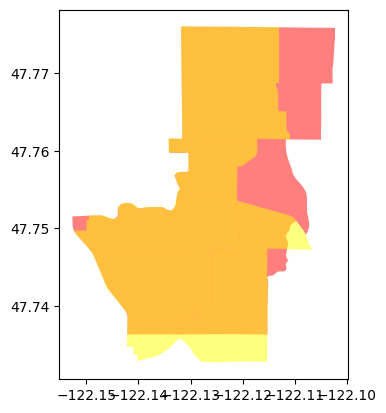

In [ ]:
# Show the approximation error
base = census_blocks.loc[[CENSUS_BLOCK_INDEX]].plot('STATEFP', color='red', alpha=0.5)
filtered_precincts.plot('STATEFP', color='yellow', ax=base, alpha=0.5)

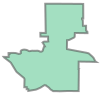

In [ ]:
# Measure the approximation error in area.
approximation = filtered_precincts.unary_union
approximation

In [ ]:
approximation_one_block = geopandas.GeoSeries([approximation], crs=4269)
approximation_one_block

0    POLYGON ((-122.13260 47.73546, -122.13260 47.7...
dtype: geometry

In [ ]:
census_block = census_blocks.loc[[CENSUS_BLOCK_INDEX], 'geometry'].reset_index()

In [ ]:
error = approximation_one_block.symmetric_difference(census_block) #선거구 근사치와 실제 인구조사 블록 간의 차이를 계산하는 작업

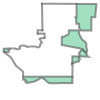

In [ ]:
error.loc[0]

In [ ]:
error.area

<ipython-input-30-a4029d802f14>:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  error.area


0    0.000333
dtype: float64

In [ ]:
relative_error = error.area /census_block.area
relative_error

<ipython-input-31-fcc7f5e09b49>:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  relative_error = error.area /census_block.area


0    0.285826
dtype: float64

In [ ]:
for i in census_blocks.index:
  census_block_polygon = census_blocks.loc[i, 'geometry']
  overlap_precincts = precincts1[precincts1['geometry'].intersects(census_block_polygon)]
  overlap_precincts['overlap_percentage'] = None
  for idx, precinct_row in overlap_precincts.iterrows():
    precinct_geometry = precinct_row['geometry']

    # Calculate the intersection area
    intersection_area = precinct_geometry.intersection(census_block_polygon).area

    # Calculate the percentage overlap
    overlap_percentage = (intersection_area / precinct_geometry.area) * 100

    # Assign the calculated overlap_percentage to the corresponding row
    overlap_precincts.loc[idx, 'overlap_percentage'] = overlap_percentage
    filtered_precincts = overlap_precincts[overlap_precincts['overlap_percentage'] >= 50]

  # Show the approximation error
  approximation = filtered_precincts.unary_union
  approximation_one_block = geopandas.GeoSeries([approximation], crs=4269)
  census_block = census_blocks.loc[[i], 'geometry'].reset_index()
  error = approximation_one_block.symmetric_difference(census_block)
  relative_error = error.area /census_block.area
  census_blocks.loc[i,'relative_error'] = relative_error.iloc[0]

census_blocks

Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
<ipython-input-32-afd6e82da340>:23: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  relative_error = error.area /census_block.area
/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
<ipython-input-32-afd6e82da340>:23: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely inc

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,relative_error
0,53,053,072309,53053072309,723.09,Census Tract 723.09,G5020,S,3281057,2231211,+47.2193054,-122.5672166,"POLYGON ((-122.57554 47.22952, -122.56544 47.2...",0.540864
1,53,053,072311,53053072311,723.11,Census Tract 723.11,G5020,S,2443688,6948,+47.2314021,-122.5306088,"POLYGON ((-122.53713 47.21807, -122.53713 47.2...",0.312562
2,53,053,072407,53053072407,724.07,Census Tract 724.07,G5020,S,5422703,4068418,+47.2984283,-122.5635099,"POLYGON ((-122.61063 47.30733, -122.61060 47.3...",0.633665
3,53,053,072408,53053072408,724.08,Census Tract 724.08,G5020,S,15266925,5205736,+47.2877797,-122.5899163,"POLYGON ((-122.61886 47.29884, -122.61885 47.2...",0.341827
4,53,053,072409,53053072409,724.09,Census Tract 724.09,G5020,S,5871772,2575269,+47.2832879,-122.6150486,"POLYGON ((-122.64978 47.27622, -122.64950 47.2...",0.439232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1779,53,061,042006,53061042006,420.06,Census Tract 420.06,G5020,S,2671654,0,+47.8941067,-122.2989261,"POLYGON ((-122.31235 47.89200, -122.31234 47.8...",0.657634
1780,53,061,050102,53061050102,501.02,Census Tract 501.02,G5020,S,1806646,0,+47.8581220,-122.2955906,"POLYGON ((-122.30367 47.85577, -122.30367 47.8...",0.004457
1781,53,053,073122,53053073122,731.22,Census Tract 731.22,G5020,S,5032204,0,+47.1057867,-122.2741688,"POLYGON ((-122.29350 47.09960, -122.29350 47.1...",0.205707
1782,53,061,050600,53061050600,506,Census Tract 506,G5020,S,3211678,979015,+47.7879463,-122.3880188,"POLYGON ((-122.40094 47.78211, -122.40062 47.7...",0.263561


In [ ]:
census_blocks

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,relative_error
0,53,053,072309,53053072309,723.09,Census Tract 723.09,G5020,S,3281057,2231211,+47.2193054,-122.5672166,"POLYGON ((-122.57554 47.22952, -122.56544 47.2...",0.540864
1,53,053,072311,53053072311,723.11,Census Tract 723.11,G5020,S,2443688,6948,+47.2314021,-122.5306088,"POLYGON ((-122.53713 47.21807, -122.53713 47.2...",0.312562
2,53,053,072407,53053072407,724.07,Census Tract 724.07,G5020,S,5422703,4068418,+47.2984283,-122.5635099,"POLYGON ((-122.61063 47.30733, -122.61060 47.3...",0.633665
3,53,053,072408,53053072408,724.08,Census Tract 724.08,G5020,S,15266925,5205736,+47.2877797,-122.5899163,"POLYGON ((-122.61886 47.29884, -122.61885 47.2...",0.341827
4,53,053,072409,53053072409,724.09,Census Tract 724.09,G5020,S,5871772,2575269,+47.2832879,-122.6150486,"POLYGON ((-122.64978 47.27622, -122.64950 47.2...",0.439232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1779,53,061,042006,53061042006,420.06,Census Tract 420.06,G5020,S,2671654,0,+47.8941067,-122.2989261,"POLYGON ((-122.31235 47.89200, -122.31234 47.8...",0.657634
1780,53,061,050102,53061050102,501.02,Census Tract 501.02,G5020,S,1806646,0,+47.8581220,-122.2955906,"POLYGON ((-122.30367 47.85577, -122.30367 47.8...",0.004457
1781,53,053,073122,53053073122,731.22,Census Tract 731.22,G5020,S,5032204,0,+47.1057867,-122.2741688,"POLYGON ((-122.29350 47.09960, -122.29350 47.1...",0.205707
1782,53,061,050600,53061050600,506,Census Tract 506,G5020,S,3211678,979015,+47.7879463,-122.3880188,"POLYGON ((-122.40094 47.78211, -122.40062 47.7...",0.263561


In [ ]:
csv_file_path = 'Overlapping.csv'

# Use the to_csv method to save the DataFrame as a CSV file
census_blocks.to_csv(csv_file_path, index= True)
print(f"DataFrame has been saved to {csv_file_path}")

DataFrame has been saved to Overlapping.csv


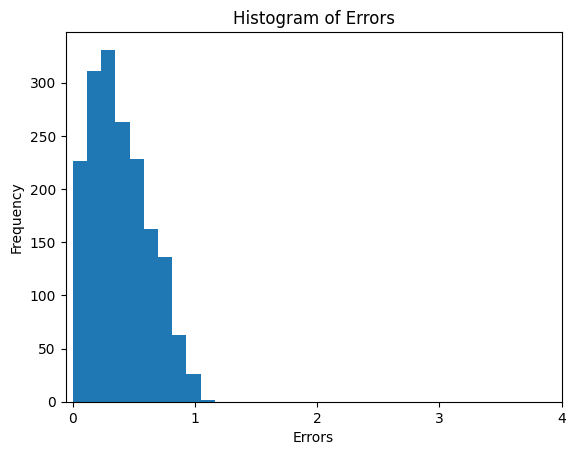

In [ ]:
import matplotlib.pyplot as plt

plt.hist(census_blocks['relative_error'])
# Add labels and a title
plt.xticks(np.arange(0, 5))
plt.xlabel('Errors')
plt.ylabel('Frequency')
plt.title('Histogram of Errors')
plt.savefig("Centroid_Histogram_WA.png")
# Show the plot
plt.show()

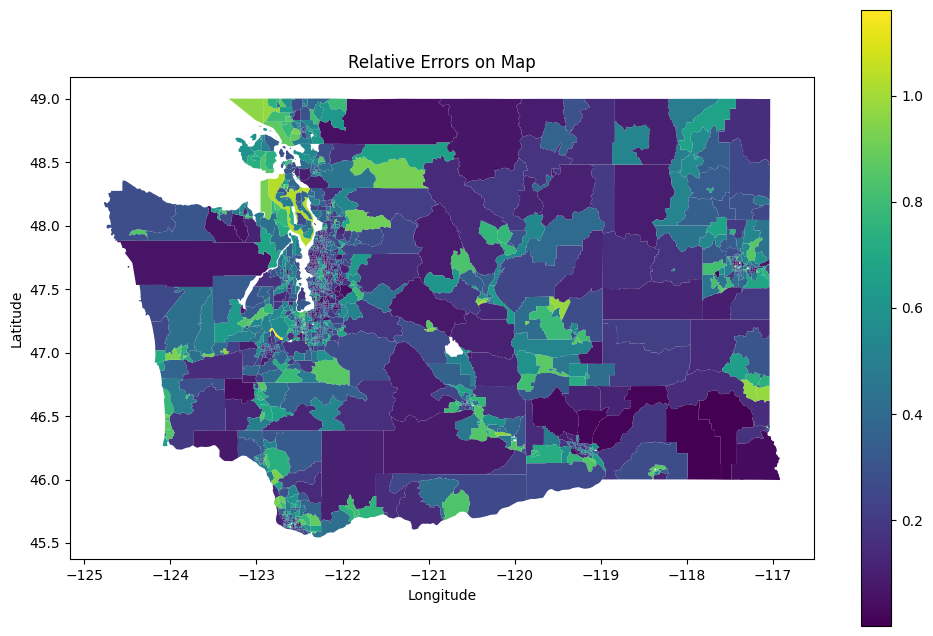

In [ ]:
base_map = census_blocks.plot(column='relative_error',legend=True, figsize=(12, 8))

plt.title('Relative Errors on Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig('Centroid_Histogram_Map_WA.png')

# Show the plot
plt.show()

In [ ]:
filtered_precincts

,STATEFP,COUNTYFP,PRECCODE,COUNTY,ST_CODE,PRECINCT,G20PREDBID,G20PRERTRU,G20PRELJOR,G20PREGHAW,...,G20ATGOWRI,G20LANDFRA,G20LANRPED,G20LANOWRI,G20INSDKRE,G20INSRPAT,G20INSOWRI,geometry,Biden_proportion,overlap_percentage
6429,53,061,73231577,Snohomish,SN73231577,EDMONDS 52,532,139,12,1,...,0,495,163,0,513,132,3,"POLYGON ((-122.33554 47.79237, -122.33283 47.7...",0.792846,98.489492
6463,53,061,73238910,Snohomish,SN73238910,MOUNTLAKE TERRACE WELL SITE,0,0,0,0,...,0,0,0,0,0,0,0,"POLYGON ((-122.33292 47.77804, -122.33271 47.7...",NaN,100.0
6541,53,061,73231133,Snohomish,SN73231133,EDMONDS 19,532,186,11,10,...,0,497,226,1,537,179,1,"MULTIPOLYGON (((-122.33554 47.79237, -122.3355...",0.740947,85.959355


In [ ]:
results = pd.DataFrame(columns=['County', 'CensusBlock', 'Precinct'])

for i in census_blocks.index:
    census_block_tract_id = census_blocks.loc[i, 'NAMELSAD']
    census_block_polygon = census_blocks.loc[i, 'geometry']
    overlap_precincts = precincts1[precincts1['geometry'].intersects(census_block_polygon)]
    overlap_precincts['overlap_percentage'] = None
    for idx, precinct_row in overlap_precincts.iterrows():
        precinct_geometry = precinct_row['geometry']
        # Calculate the intersection area
        intersection_area = precinct_geometry.intersection(census_block_polygon).area

        # Calculate the percentage overlap
        overlap_percentage = (intersection_area / precinct_geometry.area) * 100

        # Assign the calculated overlap_percentage to the corresponding row
        overlap_precincts.loc[idx, 'overlap_percentage'] = overlap_percentage

    # Filter the precincts for overlap_percentage >= 50
        filtered_precincts1 = overlap_precincts[overlap_precincts['overlap_percentage'] >= 50]

    # Extract the 'PRECINCT' values from the filtered precincts
        precincts_list = filtered_precincts1['PRECINCT'].tolist()
        county_list = filtered_precincts1['COUNTY'].tolist()

    # Append a row to the results DataFrame
        for county,precinct in zip(county_list,precincts_list):
            results = results.append({'County': county,  'CensusBlock': census_block_tract_id, 'Precinct': precinct}, ignore_index=True)

Streaming output truncated to the last 5000 lines.
<ipython-input-38-04bcece6e6fc>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'County': county,  'CensusBlock': census_block_tract_id, 'Precinct': precinct}, ignore_index=True)
<ipython-input-38-04bcece6e6fc>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'County': county,  'CensusBlock': census_block_tract_id, 'Precinct': precinct}, ignore_index=True)
<ipython-input-38-04bcece6e6fc>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'County': county,  'CensusBlock': census_block_tract_id, 'Precinct': precinct}, ignore_index=True)
<ipython-input-38-04bcece6e6fc>:28: FutureWarning: The frame.

In [ ]:
results

,County,CensusBlock,Precinct
0,Pierce,Census Tract 723.09,28-517
1,Pierce,Census Tract 723.09,28-517
2,Pierce,Census Tract 723.09,28-516
3,Pierce,Census Tract 723.09,28-517
4,Pierce,Census Tract 723.09,28-516
...,...,...,...
55246,Snohomish,Census Tract 509,EDMONDS 52
55247,Snohomish,Census Tract 509,MOUNTLAKE TERRACE WELL SITE
55248,Snohomish,Census Tract 509,EDMONDS 52
55249,Snohomish,Census Tract 509,MOUNTLAKE TERRACE WELL SITE


In [ ]:
results['Geographic Area Name'] = results['CensusBlock'] + ',' + results['County'] +' County' +', Washington'

In [ ]:
results

,County,CensusBlock,Precinct,Geographic Area Name
0,Pierce,Census Tract 723.09,28-517,"Census Tract 723.09,Pierce County, Washington"
1,Pierce,Census Tract 723.09,28-517,"Census Tract 723.09,Pierce County, Washington"
2,Pierce,Census Tract 723.09,28-516,"Census Tract 723.09,Pierce County, Washington"
3,Pierce,Census Tract 723.09,28-517,"Census Tract 723.09,Pierce County, Washington"
4,Pierce,Census Tract 723.09,28-516,"Census Tract 723.09,Pierce County, Washington"
...,...,...,...,...
55246,Snohomish,Census Tract 509,EDMONDS 52,"Census Tract 509,Snohomish County, Washington"
55247,Snohomish,Census Tract 509,MOUNTLAKE TERRACE WELL SITE,"Census Tract 509,Snohomish County, Washington"
55248,Snohomish,Census Tract 509,EDMONDS 52,"Census Tract 509,Snohomish County, Washington"
55249,Snohomish,Census Tract 509,MOUNTLAKE TERRACE WELL SITE,"Census Tract 509,Snohomish County, Washington"


In [ ]:
result_df = pd.merge(results, precincts1, left_on='Precinct', right_on='PRECINCT')
result1 = result_df[['Geographic Area Name', 'Precinct', 'Biden_proportion']]
result1

,Geographic Area Name,Precinct,Biden_proportion
0,"Census Tract 723.09,Pierce County, Washington",28-517,0.676213
1,"Census Tract 723.09,Pierce County, Washington",28-517,0.676213
2,"Census Tract 723.09,Pierce County, Washington",28-517,0.676213
3,"Census Tract 723.09,Pierce County, Washington",28-517,0.676213
4,"Census Tract 723.09,Pierce County, Washington",28-517,0.676213
...,...,...,...
58957,"Census Tract 509,Snohomish County, Washington",EDMONDS 52,0.792846
58958,"Census Tract 509,Snohomish County, Washington",EDMONDS 52,0.792846
58959,"Census Tract 509,Snohomish County, Washington",MOUNTLAKE TERRACE WELL SITE,NaN
58960,"Census Tract 509,Snohomish County, Washington",MOUNTLAKE TERRACE WELL SITE,NaN


In [ ]:
result = results.groupby('Geographic Area Name')['Precinct'].unique().reset_index()
result

,Geographic Area Name,Precinct
0,"Census Tract 1,Whitman County, Washington","[PULLMAN CITY 126, PULLMAN CITY 124, PULLMAN C..."
1,"Census Tract 1,Yakima County, Washington","[0112, 0101]"
2,"Census Tract 1.01,King County, Washington","[SEA 46-2371, SEA 46-2370, SEA 46-2353]"
3,"Census Tract 1.01,Whatcom County, Washington","[163, 164, 159, 157, 158, 155]"
4,"Census Tract 1.02,King County, Washington","[SEA 46-2369, SEA 46-2345, SEA 46-2346, SEA 46..."
...,...,...
1740,"Census Tract 98.01,King County, Washington","[SEA 34-1426, SEA 34-1423, SEA 34-1429, SEA 34..."
1741,"Census Tract 98.02,King County, Washington","[SEA 34-1456, SEA 34-1457, SEA 34-1451, SEA 34..."
1742,"Census Tract 9800,Cowlitz County, Washington","[ALABAMA, INDUSTRIAL]"
1743,"Census Tract 9801,Franklin County, Washington",[PCT 008]


In [ ]:
# Function to calculate average of a list
def calculate_average(lst):
    return sum(lst) / len(lst) if len(lst) > 0 else 0

In [ ]:
result2 = result1.groupby('Geographic Area Name')['Biden_proportion'].unique().reset_index()
result2

,Geographic Area Name,Biden_proportion
0,"Census Tract 1,Whitman County, Washington","[0.8831168831168831, 0.8238341968911918, 0.771..."
1,"Census Tract 1,Yakima County, Washington","[0.6417322834645669, 0.6165644171779141]"
2,"Census Tract 1.01,King County, Washington","[0.8674351585014409, 0.8853211009174312, 0.9]"
3,"Census Tract 1.01,Whatcom County, Washington","[0.5120643431635389, 0.41312741312741313, 0.74..."
4,"Census Tract 1.02,King County, Washington","[0.8522483940042827, 0.8498293515358362, 0.887..."
...,...,...
1740,"Census Tract 98.01,King County, Washington","[0.8682432432432432, 0.9057142857142857, 0.889..."
1741,"Census Tract 98.02,King County, Washington","[0.8853658536585366, 0.9090909090909091, 0.899..."
1742,"Census Tract 9800,Cowlitz County, Washington","[0.4658682634730539, nan]"
1743,"Census Tract 9801,Franklin County, Washington",[0.32517482517482516]


In [ ]:
result2['average_Biden_proportion'] = result2['Biden_proportion'].apply(calculate_average)
result2

,Geographic Area Name,Biden_proportion,average_Biden_proportion
0,"Census Tract 1,Whitman County, Washington","[0.8831168831168831, 0.8238341968911918, 0.771...",0.802316
1,"Census Tract 1,Yakima County, Washington","[0.6417322834645669, 0.6165644171779141]",0.629148
2,"Census Tract 1.01,King County, Washington","[0.8674351585014409, 0.8853211009174312, 0.9]",0.884252
3,"Census Tract 1.01,Whatcom County, Washington","[0.5120643431635389, 0.41312741312741313, 0.74...",0.461398
4,"Census Tract 1.02,King County, Washington","[0.8522483940042827, 0.8498293515358362, 0.887...",0.857644
...,...,...,...
1740,"Census Tract 98.01,King County, Washington","[0.8682432432432432, 0.9057142857142857, 0.889...",0.884990
1741,"Census Tract 98.02,King County, Washington","[0.8853658536585366, 0.9090909090909091, 0.899...",0.882116
1742,"Census Tract 9800,Cowlitz County, Washington","[0.4658682634730539, nan]",NaN
1743,"Census Tract 9801,Franklin County, Washington",[0.32517482517482516],0.325175


In [ ]:
csv_file_path = '/content/drive/MyDrive/capstone_yb/overlapping_matching.csv'

# Use the to_csv method to save the DataFrame as a CSV file
results.to_csv(csv_file_path, index= True)
print(f"DataFrame has been saved to {csv_file_path}")

DataFrame has been saved to /content/drive/MyDrive/capstone_yb/overlapping_matching.csv


In [ ]:
csv_file_path = '/content/drive/MyDrive/capstone_yb/overlapping_matching2.csv'

# Use the to_csv method to save the DataFrame as a CSV file
result1.to_csv(csv_file_path, index= True)
print(f"DataFrame has been saved to {csv_file_path}")

DataFrame has been saved to /content/drive/MyDrive/capstone_yb/overlapping_matching2.csv


In [ ]:
csv_file_path = '/content/drive/MyDrive/capstone_yb/overlapping_matching_avg_biden.csv'

# Use the to_csv method to save the DataFrame as a CSV file
result2.to_csv(csv_file_path, index= True)
print(f"DataFrame has been saved to {csv_file_path}")

DataFrame has been saved to /content/drive/MyDrive/capstone_yb/overlapping_matching_avg_biden.csv
